In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
import scipy
from ikrlib import *

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Reshape, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout

In [3]:
# paths to data directories
TRAIN_TARGET = '../data/target_train/'
TRAIN_NTARGET = '../data/non_target_train/'
TEST_TARGET = '../data/target_dev/'
TEST_NTARGET = '../data/non_target_dev/'

# first, load target and non-target training and test data
train_target = png2fea(TRAIN_TARGET).values() # target training data
train_ntarget = png2fea(TRAIN_NTARGET).values() # non-target training data
test_target = png2fea(TEST_TARGET).values() # target test data
test_ntarget = png2fea(TEST_NTARGET).values() # non-target test data

Processing file:  ../data/target_train/m429_01_r10_i0_0.png
Processing file:  ../data/target_train/m429_01_r07_i0_0.png
Processing file:  ../data/target_train/m429_01_p01_i0_0.png
Processing file:  ../data/target_train/m429_02_r08_i0_0.png
Processing file:  ../data/target_train/m429_01_r08_i0_0.png
Processing file:  ../data/target_train/m429_01_p05_i0_0.png
Processing file:  ../data/target_train/m429_01_p03_i0_0.png
Processing file:  ../data/target_train/m429_02_p02_i0_0.png
Processing file:  ../data/target_train/m429_02_p01_i0_0.png
Processing file:  ../data/target_train/m429_02_r06_i0_0.png
Processing file:  ../data/target_train/m429_01_r06_i0_0.png
Processing file:  ../data/target_train/m429_02_r07_i0_0.png
Processing file:  ../data/target_train/m429_02_r09_i0_0.png
Processing file:  ../data/target_train/m429_02_p03_i0_0.png
Processing file:  ../data/target_train/m429_01_r09_i0_0.png
Processing file:  ../data/target_train/m429_02_p04_i0_0.png
Processing file:  ../data/target_train/m

Processing file:  ../data/non_target_train/f401_03_f19_i0_0.png
Processing file:  ../data/non_target_train/f405_01_f19_i0_0.png
Processing file:  ../data/non_target_train/f401_02_r08_i0_0.png
Processing file:  ../data/non_target_train/m421_03_r08_i0_0.png
Processing file:  ../data/non_target_train/m416_04_r08_i0_0.png
Processing file:  ../data/non_target_train/f405_04_f19_i0_0.png
Processing file:  ../data/non_target_train/m419_04_r08_i0_0.png
Processing file:  ../data/non_target_train/m420_03_r08_i0_0.png
Processing file:  ../data/non_target_train/f404_03_f19_i0_0.png
Processing file:  ../data/non_target_train/m414_02_r08_i0_0.png
Processing file:  ../data/non_target_train/m414_03_f19_i0_0.png
Processing file:  ../data/non_target_train/m421_04_f19_i0_0.png
Processing file:  ../data/non_target_train/m417_04_r08_i0_0.png
Processing file:  ../data/non_target_train/f401_01_f19_i0_0.png
Processing file:  ../data/non_target_train/m422_02_r08_i0_0.png
Processing file:  ../data/non_target_tra

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

def prepare_test_data(target, ntarget):
    data = []
    cls = []
    for image in target:
        data.append(image.flatten().reshape(80, 80, 1))
        cls.append(0)
    for image in ntarget:
        data.append(image.flatten().reshape(80, 80, 1))
        cls.append(1)
    return data, cls

In [5]:
# First, reshape andprepare our training data
x = []
i = 0
for im in train_target:
    x.append(im.flatten().reshape(80, 80, 1))
    i += 1
for im in train_ntarget:
    x.append(im.flatten().reshape(80, 80, 1))
    
X_train = np.array(x)
y_train = np.zeros((X_train.shape[0], 2), dtype=int)

# set class flags
for ii in range(X_train.shape[0]):
    if ii < i:
        y_train[ii][0] = 1
    else:
        y_train[ii][1] = 1
    
X_test, test_cls = prepare_test_data(test_target, test_ntarget)
X_test = np.array(X_test)

from tensorflow.keras.utils import to_categorical
# set the class flags
y_test = to_categorical(test_cls, num_classes=2)

In [6]:
# The number of pixels in each dimension of an image.
img_size = 80

# The images are stored in one-dimensional arrays of this length.
img_size_flat = 80*80

# Tuple with height and width of images used to reshape arrays.
img_shape = (80, 80)

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (80, 80, 1)

# Number of classes, one class for each of 10 digits.
num_classes = 2

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

In [28]:
# Let's build our model
model = Sequential()

# Next up are four convolutional layers with 2x2 max pooling
model.add(Conv2D(kernel_size=5, strides=1, filters=8, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

#model.add(Conv2D(kernel_size=5, strides=1, filters=128, padding='same',
#                 activation='relu', name='layer_conv3'))
#model.add(MaxPooling2D(pool_size=2, strides=2))

#model.add(Conv2D(kernel_size=5, strides=1, filters=256, padding='same',
#                 activation='relu', name='layer_conv4'))
#model.add(MaxPooling2D(pool_size=2, strides=2))


# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [29]:
from tensorflow.keras.optimizers import Adam

# compile the model
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Augment the training data using the data generator and feed them to the network
datagen = ImageDataGenerator(brightness_range=(0.8, 1.3), zoom_range=[0.8, 1.1], rotation_range=10)
datagen.fit(X_train)
model.fit(datagen.flow(X_train, y_train, batch_size=1),
          steps_per_epoch=X_train.shape[0]//2,
          epochs=5,
          validation_data=(X_test, y_test)
         )

Train for 76 steps, validate on 70 samples
Epoch 1/5
76/76 [==============================] - 1s 13ms/step - loss: 3.2404 - accuracy: 0.8553 - val_loss: 1.9100 - val_accuracy: 0.8429
Epoch 2/5
76/76 [==============================] - 1s 9ms/step - loss: 1.2185 - accuracy: 0.8816 - val_loss: 2.4025 - val_accuracy: 0.8571
Epoch 3/5
76/76 [==============================] - 1s 9ms/step - loss: 0.4475 - accuracy: 0.9342 - val_loss: 2.5030 - val_accuracy: 0.8571
Epoch 4/5
76/76 [==============================] - 1s 9ms/step - loss: 0.4865 - accuracy: 0.9342 - val_loss: 5.8027 - val_accuracy: 0.8571
Epoch 5/5
76/76 [==============================] - 1s 9ms/step - loss: 0.4342 - accuracy: 0.9211 - val_loss: 1.3649 - val_accuracy: 0.7429


In [27]:
# Evaluate the model
result = model.evaluate(x=X_test, y=y_test)

for name, value in zip(model.metrics_names, result):
    print(name, value)

70/70 [==============================] - 0s 2ms/sample - loss: 5.1039 - accuracy: 0.8000
loss 5.103918092165674
accuracy 0.8


In [15]:
# This function just helps us visualize some of the results...
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='gray')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

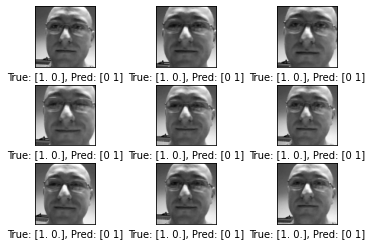

In [17]:
# Plot a few images along with their predicted and actual classes
images = X_test[0:9]
images = np.array(images)
cls_true = y_test[0:9]
y_pred = model.predict(x=images)
cls_pred = (y_pred +0.5).astype(np.int8)
plot_images(images=images,
            cls_true=cls_true,
            cls_pred=cls_pred)